Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from glob import glob


In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset


data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test')



In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

(32, 180, 180, 3)
(32,)


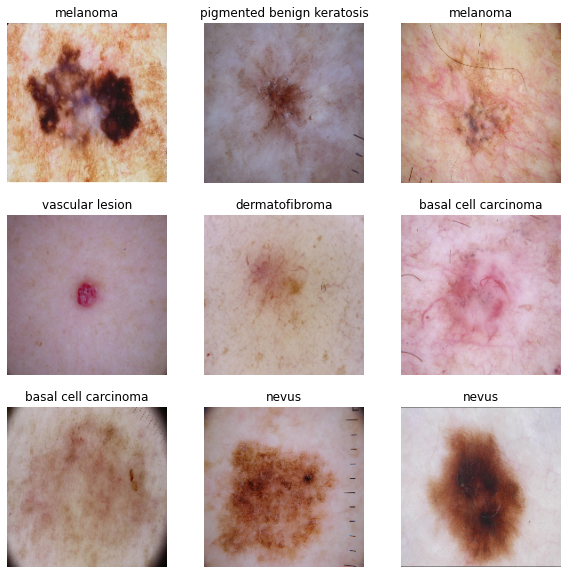

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:

num_classes = 9

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Flatten()),

model.add(Dense(128,activation='relu')),

model.add(Dense(64,activation='relu')),

model.add(Dense(num_classes, activation = "softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 369s 1s/step - loss: 2.0258 - accuracy: 0.2266 - val_loss: 1.8939 - val_accuracy: 0.2796
Epoch 2/20
56/56 [==============================] - 55s 990ms/step - loss: 1.7862 - accuracy: 0.3438 - val_loss: 1.6787 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 56s 1s/step - loss: 1.5729 - accuracy: 0.4481 - val_loss: 1.6602 - val_accuracy: 0.4474
Epoch 4/20
56/56 [==============================] - 55s 992ms/step - loss: 1.4130 - accuracy: 0.5095 - val_loss: 1.3966 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 55s 987ms/step - loss: 1.3260 - accuracy: 0.5368 - val_loss: 1.4308 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 54s 966ms/step - loss: 1.2696 - accuracy: 0.5491 - val_loss: 1.3676 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 61s 1s/step - loss: 1.1366 - accuracy: 0.5938 - val_loss: 1.3661 - val_accuracy: 0.5593
Epoch 8/20
56/56 [

### Visualizing training results

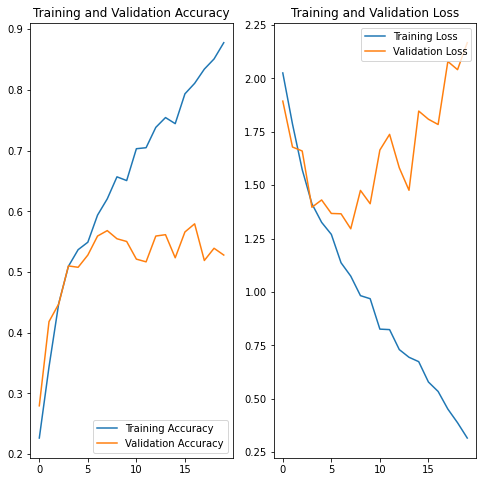

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

**Model 1 Observations:**

Model has  a training accuracy of 87%, while a validation accuracy of 52%. The model is performing very well on train set but not so well on test set, this indicates overfitting.


In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Verify the Augmentation strategy by visualizing one instance of training image


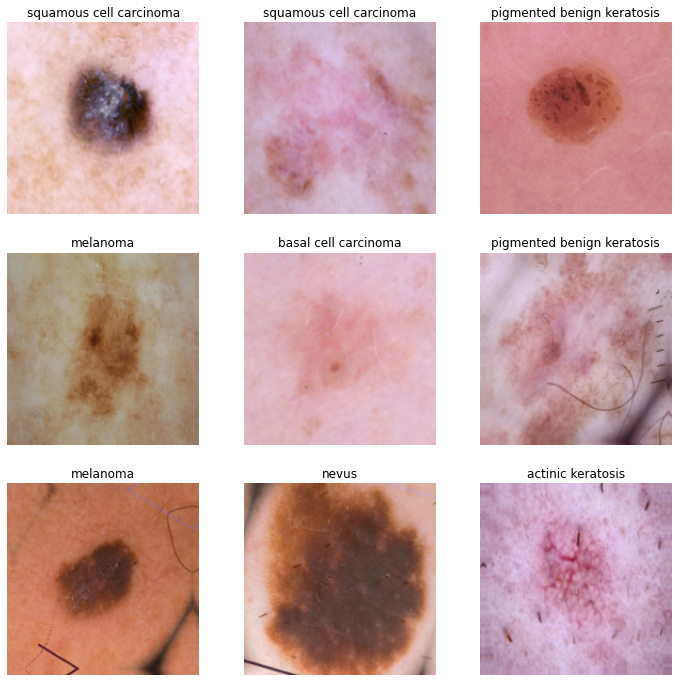

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


Let us use droput and augmentation layer with the base model.

In [21]:
num_classes = 9

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Dropout(0.25))

model.add(Flatten()),

model.add(Dense(128,activation='relu')),

model.add(Dense(64,activation='relu')),

model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [22]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=True
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 66s 1s/step - loss: 2.0647 - accuracy: 0.2037 - val_loss: 1.9841 - val_accuracy: 0.2931
Epoch 2/20
56/56 [==============================] - 68s 1s/step - loss: 1.9107 - accuracy: 0.3013 - val_loss: 1.7795 - val_accuracy: 0.3535
Epoch 3/20
56/56 [==============================] - 67s 1s/step - loss: 1.6309 - accuracy: 0.4275 - val_loss: 1.4930 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 65s 1s/step - loss: 1.4847 - accuracy: 0.4710 - val_loss: 1.6293 - val_accuracy: 0.4564
Epoch 5/20
56/56 [==============================] - 69s 1s/step - loss: 1.4355 - accuracy: 0.4994 - val_loss: 1.4244 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 65s 1s/step - loss: 1.3691 - accuracy: 0.5117 - val_loss: 1.4499 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 66s 1s/step - loss: 1.3237 - accuracy: 0.5268 - val_loss: 1.4547 - val_accuracy: 0.5145
Epoch 8/20
56/56 [=============

### Visualizing the results

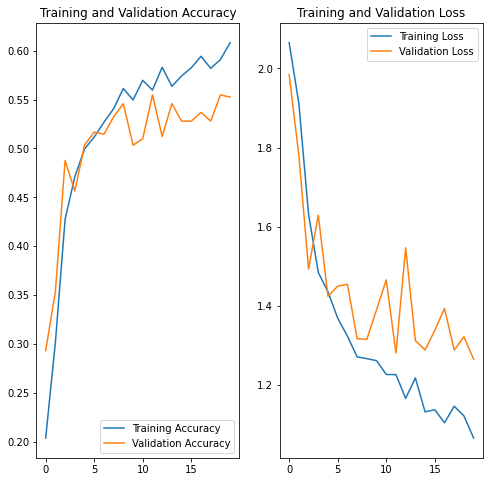

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Model 2 observation:**

We can see that overfitting is now resolved, but the training and validation accuracy hasve gone down significantly- this means the model is not able to identify any significant patterns in the data. This means that the model is Underfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


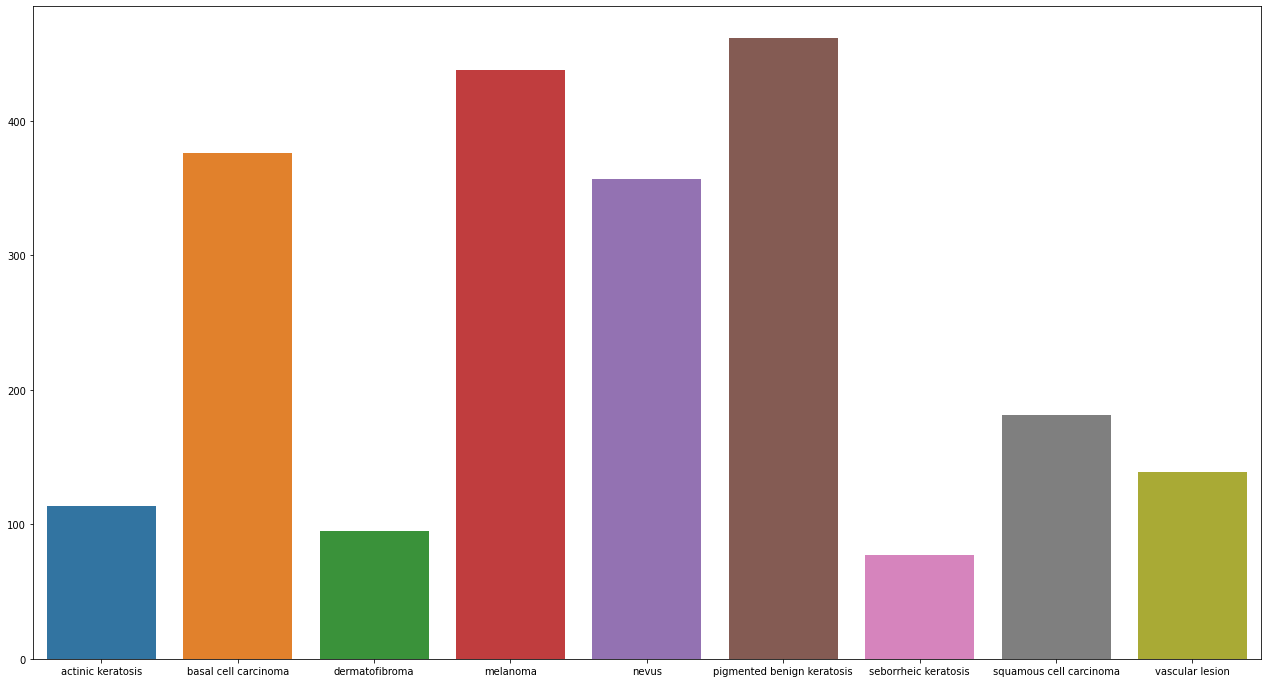

In [25]:
## Your code goes here.


class_dict_orig = {}
for i in class_names:
    class_path = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" + i)
    class_count = len(list(class_path.glob('*.jpg')))
    class_dict_orig[i] = class_count

import seaborn as sns
fig, ax = plt.subplots(figsize=(22,12))
sns.barplot(list(class_dict_orig.keys()), list(class_dict_orig.values()))
plt.show()



In [26]:
pd.DataFrame(list(class_dict_orig.items()),columns = ["Class Names","Number of Images"]).sort_values(by=["Number of Images"])


,Class Names,Number of Images
6,seborrheic keratosis,77
2,dermatofibroma,95
0,actinic keratosis,114
8,vascular lesion,139
7,squamous cell carcinoma,181
4,nevus,357
1,basal cell carcinoma,376
3,melanoma,438
5,pigmented benign keratosis,462


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

Class 'seborrheic keratosis' has the least number of samples of 77.
#### - Which classes dominate the data in terms proportionate number of samples?

Class 'pigmented benign keratosis' with 462 samples dominates the data in terms of proportionate number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
import Augmentor
import shutil, sys 

data_dir_train = "/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/"

#if path already exists, remove it before copying with copytree()
if os.path.exists(data_dir_train):
  shutil.rmtree(data_dir_train)
  shutil.copytree("/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/", data_dir_train)
else:
  shutil.copytree("/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/", data_dir_train)

for i in class_names:
    print("/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" + i+"\n")
    p = Augmentor.Pipeline(data_dir_train + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE197057040>: 100%|██████████| 500/500 [00:23<00:00, 21.33 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE19360C3D0>: 100%|██████████| 500/500 [00:24<00:00, 20.23 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1981FB580>: 100%|██████████| 500/500 [00:23<00:00, 20.94 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FE202E416D0>: 100%|██████████| 500/500 [01:45<00:00,  4.74 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FE19563FD90>: 100%|██████████| 500/500 [01:29<00:00,  5.61 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE19C8EEC70>: 100%|██████████| 500/500 [00:25<00:00, 19.59 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE19711FE80>: 100%|██████████| 500/500 [00:53<00:00,  9.34 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1A1E03220>: 100%|██████████| 500/500 [00:22<00:00, 22.10 Samples/s]


/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train_class_balanced/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE19C82F8B0>: 100%|██████████| 500/500 [00:23<00:00, 21.44 Samples/s]


In [29]:
class_dict_new = {}
for i in class_names:
    class_path = pathlib.Path(data_dir_train + i)
    class_count = len(list(class_path.glob('*.jpg')))
    class_Output_path = pathlib.Path(data_dir_train + i+"/output")
    class_Output_count = len(list(class_Output_path.glob('*.jpg')))
    class_dict_new[i] = class_count + class_Output_count

In [30]:
pd.DataFrame(list(class_dict_new.items()),columns = ["Class Names","Number of Images"]).sort_values(by=["Number of Images"])


,Class Names,Number of Images
6,seborrheic keratosis,577
2,dermatofibroma,595
0,actinic keratosis,614
8,vascular lesion,639
7,squamous cell carcinoma,681
4,nevus,857
1,basal cell carcinoma,876
3,melanoma,938
5,pigmented benign keratosis,962


With the use of Augmentor, the the class imbalance has been reduced, as all the classes now have atleast 500 images.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

### Lets see the distribution of augmented data after adding new images to the original training data.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [31]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [32]:
#data_dir_train="path to directory with training data + data created using augmentor"
#data_dir_train="/content/gdrive/MyDrive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',       ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',         ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [35]:

# Base Model + Dropout Layers + Data Augmentation + Class balanced Dataset


num_classes = 9

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))])

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same', activation='relu')),

model.add(MaxPool2D()),

model.add(Dropout(0.25))

model.add(Flatten()),

model.add(Dense(128,activation='relu')),

model.add(Dense(64,activation='relu')),

model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [36]:
## your code goes here

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [37]:
#epochs = 30
## Your code goes here, use 50 epochs.
#history = # your model fit code

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 235s 1s/step - loss: 1.8563 - accuracy: 0.2789 - val_loss: 1.6039 - val_accuracy: 0.3660
Epoch 2/30
169/169 [==============================] - 234s 1s/step - loss: 1.4985 - accuracy: 0.4247 - val_loss: 1.3916 - val_accuracy: 0.4826
Epoch 3/30
169/169 [==============================] - 231s 1s/step - loss: 1.4118 - accuracy: 0.4594 - val_loss: 1.3865 - val_accuracy: 0.4803
Epoch 4/30
169/169 [==============================] - 225s 1s/step - loss: 1.3125 - accuracy: 0.5017 - val_loss: 1.2738 - val_accuracy: 0.5338
Epoch 5/30
169/169 [==============================] - 229s 1s/step - loss: 1.2588 - accuracy: 0.5213 - val_loss: 1.2439 - val_accuracy: 0.5412
Epoch 6/30
169/169 [==============================] - 227s 1s/step - loss: 1.2123 - accuracy: 0.5384 - val_loss: 1.2246 - val_accuracy: 0.5353
Epoch 7/30
169/169 [==============================] - 225s 1s/step - loss: 1.1480 - accuracy: 0.5621 - val_loss: 1.1024 - val_accuracy: 0.5887

#### **Todo:**  Visualize the model results

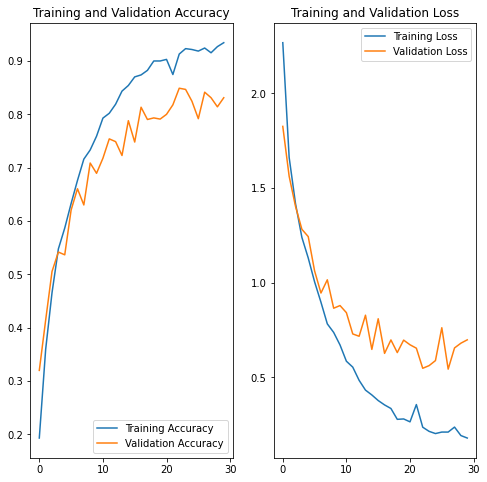

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Now we can see that the underfitting of previous model is solved.


**Model 3 observation :** The model has Training accuracy of 80% and Validation accuracy of 77 % ,after running 30 epochs. We can cosider this an admissable result for thius model.

Note: We can use few more model iterations and increase few more droputs, batch normalization layers, or increase the number of convolution layers with small filter size (up to a certain limit) - so as to further improve the accuracy of this model.



## Summary

Below is a summary of results obtained:

- Model 1: 'Basic' Model
  - Model Training has good accuracy - Training accuracy 87% but Validation Accuracy is low of 52%.
  - Model is Overfitting.

- Model 2: Model 1 with Dropout Layer and Data Augmentation
  - Dropout Layers are added
  - Data Augmentation layer is added
  - Accuracy of the model is reduced as compared to model 1 - Training Accuracy 60% and Validation Accuracy 55%
  - Model is Underfitting.

- Model 3: Model 1 with Dropout Layer, Data Augmentation and a Class balanced Dataset
  - To fix the class imbalance issue, Dataset is added using Augmentor (500 images added per class)
  - The accuracy of the model is improved. So we can consider this base CNN model with droput, data augmentation and class imbalance fix - as our final model.
  - Final Accuracy of the model is - Training Accuracy 80% and Validation Accuracy 77%